# MA336: Artificial intelligence and machine learning with applications

# Reg No. 2320792

#  Football Player Market Value Prediction

## Introduction



The most popular sport in the world is football, or soccer as it is called in certain other nations. Professional leagues and tournaments are held all over the world, with millions of followers following the sport. The economy of the sport heavily relies on the market valuations  of players, whose on-field performances are closely monitored. A player's abilities, performance indicators, age, position, and the level of competition in the leagues they play in all have a role in determining these values.

in this project we aim to analyze and predict the market value of football players.we create a machine learning and artificial intelligence models that will accurately predict market valuations of players. the dataset is taken from Kaggle and can be found here(https://www.kaggle.com/datasets/davidcariboo/player-scores?select=appearances.csv) . In this link, there are many datasets in football, so <b>I chose appearances.csv - https://www.kaggle.com/datasets/davidcariboo/player-scores?select=appearances.csv, players.csv - https://www.kaggle.com/datasets/davidcariboo/player-scores?select=players.csv , player_valuations.csv - https://www.kaggle.com/datasets/davidcariboo/player-scores?select=player_valuations.csv and games.csv- https://www.kaggle.com/datasets/davidcariboo/player-scores?select=games.csv </b> and Download these datasets to run code. we explore data,analyze data, performing exploratory data analysis (EDA), clean the data by removing NaN values, extract required information from different related datasets, and merge them into a final DataFrame.finally we will train models and visualize the result to gain insights.



In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings

# Suppress FutureWarning messages
warnings.filterwarnings('ignore')

## Datasets


The datasets used in this project combine multiple CSV for a comprehensive analysis:

1. **Player Information**: Provides players-specific data such as player ID, first name, last name, full name, last season played, current club ID, player code, country of birth, city of birth, country of citizenship, date of birth, sub position, position, preferred foot, height in cm, contract expiration date, agent name, image URL, profile URL, current club domestic competition ID, current club name, market value in EUR, and highest market value in EUR.

2. **Player Valuations**: Contains player ID, date, market value in EUR, current club ID, and player club domestic competition ID.

3. **Player Appearances**: Includes player ID, player club ID, date, player name, competition ID, yellow cards, red cards, goals, assists, and minutes played.

4. **Games Data**: Contains game ID, competition ID, season, round, date, home and away club details (club ID, goals, positions, manager names), stadium info, attendance, referee, URL, home and away club formations, club names, aggregate score, and competition type.                                     

In [381]:
#File Read
#use datasets from the Kaggle site. I have provided a link in the introduction section,
# and which CSV I chose from the football datasets is mentioned in the introduction.

players_data = pd.read_csv(r'data\players.csv')
players_valuations_data = pd.read_csv(r'data\player_valuations.csv')
appearance_data = pd.read_csv(r'data\appearances.csv')
games_data = pd.read_csv(r'data\games.csv')


first ,lets take a look at our data

In [352]:
# Display  Df
players_data.head()


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


We can see all of the player information in this data. Birthplaces, contract information, market valuations, his previous season of play, and current clubs, among other things  In total, there are more than 30515 players' data records, which offers a large amount of data for our analysis  and model training.


In [353]:
appearance_data.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In this appearance  table  we see players id,club_id ,current club_id  names and  performance metrics like goals, assists, and cards. It offers insights into the contributions and conduct of players on the field.

In [354]:
players_valuations_data.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


 These columns are  provide insights into the market valuation of players,there club id and there market_value_in_eur.


In [355]:
games_data.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,6.0,Jos Luhukay,Jens Keller,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,9.0,Bert van Marwijk,Thomas Tuchel,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


These columns provide a complete insights of every game by displaying information on the teams involved, how many goals they scored, what competition it was part of, who the managers were and practical facts like the venue and attendance figures. Analyzing this data gives us a better understanding of how teams function, how tournaments play out, and how football games are played in general over many seasons and competitions.


## Preliminary Analysis

### Data Pre-processing

In [382]:


# conversion date columns to datetime
appearance_data['date'] = pd.to_datetime(appearance_data['date'])
games_data['date'] = pd.to_datetime(games_data['date'])
players_valuations_data['date'] = pd.to_datetime(players_valuations_data['date'])

# take out month and year from date columns
appearance_data['year_month'] = appearance_data['date'].dt.to_period('M')
games_data['year_month'] = games_data['date'].dt.to_period('M')
players_valuations_data['year_month'] = players_valuations_data['date'].dt.to_period('M')

# Merge appearance_data with games_data to get season information
appearance_with_season = pd.merge(
    appearance_data,
    games_data[['game_id', 'season']],
    on='game_id',
    how='left'
)

# Calculate season_level stats for each player
season_stats = appearance_with_season.groupby(['player_id', 'season']).agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum'
}).reset_index()

# creating a function to add previous season stats
def add_previous_season_stats(df, stats, seasons_back):
    df = df.copy()
    for i in range(1, seasons_back + 1):
        prev_stats = stats.copy()
        prev_stats['season'] = prev_stats['season'] + i
        prev_stats = prev_stats.add_suffix(f'_prev_{i}')
        df = pd.merge(df, prev_stats, left_on=['player_id', 'season'], right_on=[f'player_id_prev_{i}', f'season_prev_{i}'], how='left')
    return df

# Extracting season from players_valuations_data based on games_data
players_valuations_data = pd.merge(
    players_valuations_data,
    games_data[[ 'year_month', 'season']].drop_duplicates(),
    left_on=[ 'year_month'],
    right_on=[ 'year_month'],
    how='left'
)

# combine previous season stats
final_dataframe = add_previous_season_stats(players_valuations_data, season_stats, seasons_back=2)

#For clarity, remove unnecessary columns and rename
columns_to_drop = [col for col in final_dataframe.columns if col.startswith(('player_id_prev_', 'season_prev_', 'year_month', 'competition_id')) and col not in ['yellow_card_prev_1', 'red_card_prev_1', 'goals_prev_1', 'assists_prev_1', 'minutes_played_prev_1']]
final_dataframe = final_dataframe.drop(columns=columns_to_drop)
final_dataframe = final_dataframe.rename(columns=lambda x: x.replace('_prev_1', '_previous_1_season').replace('_prev_2', '_previous_2_seasons'))

# show the final_dataframe
final_dataframe.tail()



,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,season,yellow_cards_previous_1_season,red_cards_previous_1_season,goals_previous_1_season,assists_previous_1_season,minutes_played_previous_1_season,yellow_cards_previous_2_seasons,red_cards_previous_2_seasons,goals_previous_2_seasons,assists_previous_2_seasons,minutes_played_previous_2_seasons
573602,1158515,2024-06-06,300000,60551,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573603,1159449,2024-06-06,100000,3268,PO1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573604,1159925,2024-06-06,150000,61825,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573605,1160405,2024-06-06,50000,18303,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573606,1240467,2024-06-06,50000,6992,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset provides recruiters with useful information to assess football players' market valuations and statistics from the previous season. Recruiters can evaluate players' performance patterns, consistency, and future development potential by looking at important indicators like goals, assists, and yellow and red cards from the last 2 seasons. 

Recruiters may use this information to make accurate decisions that are in line with club strategy and recruiting objectives by recognizing high-performing individuals and comprehending their contributions over the course of several seasons.

Furthermore, we can explore seasonal differences in player performance by examining the dataset year-by-year, which offers deeper insights into the adaptability and long-term impact of players. The year-by-year season metrics that are essential for a detailed evaluation of player performance are guaranteed by this method.

In [383]:
season_stats.head(10)

,player_id,season,yellow_cards,red_cards,goals,assists,minutes_played
0,10,2012,8,0,16,3,2585
1,10,2013,2,0,8,5,2220
2,10,2014,6,0,16,9,2289
3,10,2015,3,0,8,8,1714
4,26,2012,2,1,0,0,4401
5,26,2013,1,1,0,0,3855
6,26,2014,0,0,0,0,2880
7,26,2015,1,0,0,0,1260
8,26,2016,0,0,0,0,1020
9,26,2017,0,0,0,0,92



Previous data provides players' performances over the last two years. But for more insights, we take a table of season-wise stats of players. For example, in the above table, there are two players, 10 and 26. Player 26 played more defensively, as seen by the high minutes played and low goals, whereas Player 10 showed good attacking talents by constantly scoring high goals and providing assists. With such detailed season-by-season data, recruiters may make informed decisions that fit team tactics, providing a thorough understanding of players' contributions and potential.


In [384]:
# Adding player information
players_info_columns = [
    'player_id', 'name', 'country_of_birth', 'country_of_citizenship', 
    'sub_position', 'position', 'current_club_name', 'contract_expiration_date'
]

player_info = player_data[players_info_columns]

# Merge player information into final_dataframe
final_dataframe = final_dataframe.merge(player_info, on='player_id', how='left')


# Calculate current_season_stats

appearance_data['date'] = pd.to_datetime(appearance_data['date'])
current_season_start = final_dataframe['date'].max().year - 1
current_season_end = final_dataframe['date'].max().year

# Filter appearances for the current_season
current_season_appearances = appearance_data[
    (appearance_data['date'].dt.year >= current_season_start) & 
    (appearance_data['date'].dt.year <= current_season_end)
]

# Aggregate stats for the current_season
current_season_stats = current_season_appearances.groupby('player_id').agg(
    yellow_cards_current_season=('yellow_cards', 'sum'),
    red_cards_current_season=('red_cards', 'sum'),
    goals_current_season=('goals', 'sum'),
    assists_current_season=('assists', 'sum'),
    minutes_played_current_season=('minutes_played', 'sum')
).reset_index()

# Merge current_season_stats into final_dataframe
final_dataframe = final_dataframe.merge(current_season_stats, on='player_id', how='left') 

final_dataframe.tail()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,season,yellow_cards_previous_1_season,red_cards_previous_1_season,goals_previous_1_season,assists_previous_1_season,minutes_played_previous_1_season,yellow_cards_previous_2_seasons,red_cards_previous_2_seasons,goals_previous_2_seasons,assists_previous_2_seasons,minutes_played_previous_2_seasons,name,country_of_birth,country_of_citizenship,sub_position,position,current_club_name,contract_expiration_date,yellow_cards_current_season,red_cards_current_season,goals_current_season,assists_current_season,minutes_played_current_season
573602,1158515,2024-06-06,300000,60551,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ramik Gadzhyev,NaN,Ukraine,Left Winger,Attack,Sport Klub Dnipro-1,2025-06-30 00:00:00,3.0,0.0,1.0,0.0,369.0
573603,1159449,2024-06-06,100000,3268,PO1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samu,Portugal,Portugal,Right Winger,Attack,Casa Pia Atlético Clube,2026-06-30 00:00:00,0.0,0.0,0.0,0.0,4.0
573604,1159925,2024-06-06,150000,61825,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sergiy Korniychuk,Ukraine,Ukraine,Left-Back,Defender,FK Minaj,2026-12-31 00:00:00,4.0,0.0,1.0,0.0,666.0
573605,1160405,2024-06-06,50000,18303,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Viktor Dolgyi,Ukraine,Ukraine,Goalkeeper,Goalkeeper,FK Oleksandriya,2027-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN
573606,1240467,2024-06-06,50000,6992,UKR1,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artem Prysyazhnyuk,Ukraine,Ukraine,Central Midfield,Midfield,ZAO FK Chornomorets Odessa,2025-05-31 00:00:00,0.0,0.0,0.0,0.0,82.0


In order to offer an in-depth analysis of player performance, we started by selecting the necessary player details, including name, nationality, position, current club, and contract expiration date. The necessary player information from this data was merged with the main dataframe ` final_dataframe`. The current season's date range was then determined using the most recent data available, with a focus on capturing current season performance. Key performance indicators such as yellow and red cards, goals, assists, and minutes played for every player have been calculated by filtering the appearance data for this time frame. We now have the most up-to-date and useful performance data for all players. These statistics were then merged back into `final_dataframe`.Recruiters may make better decisions by using this method to assess player performance thoroughly and take into account both past and present season data.



## Data Cleaning

To clean the dataset, we first chose columns containing player information and important statistics for focused analysis.Rows with missing season data were removed to ensure completeness.After this remove missing values and columns with NaN values replace with 0.Furthermore  we dropped th `current_club_id` because we don't need now.

In [385]:



# Fill NaN values with 0 for the stats_columns
stats_columns = [
    'yellow_cards_current_season', 'red_cards_current_season', 
    'goals_current_season', 'assists_current_season', 'minutes_played_current_season','yellow_cards_previous_1_season','red_cards_previous_1_season',
    'goals_previous_1_season','assists_previous_1_season','minutes_played_previous_1_season','yellow_cards_previous_2_seasons','red_cards_previous_2_seasons',
    'goals_previous_2_seasons','assists_previous_2_seasons','minutes_played_previous_2_seasons','country_of_birth','country_of_citizenship',
    'sub_position','contract_expiration_date'
]
final_dataframe=final_dataframe.dropna(subset=['season'])
final_dataframe[stats_columns] = final_dataframe[stats_columns].fillna(0)
final_dataframe=final_dataframe.drop(columns=['current_club_id'])



In [386]:
#final_dataframe.shape
#final_dataframe['date_year'] = final_dataframe['date'].dt.year
#final_dataframe.groupby('date_year')['market_value_in_eur'].count()
pd.set_option('display.max_columns',None)
final_dataframe.tail(100)

,player_id,date,market_value_in_eur,player_club_domestic_competition_id,season,yellow_cards_previous_1_season,red_cards_previous_1_season,goals_previous_1_season,assists_previous_1_season,minutes_played_previous_1_season,yellow_cards_previous_2_seasons,red_cards_previous_2_seasons,goals_previous_2_seasons,assists_previous_2_seasons,minutes_played_previous_2_seasons,name,country_of_birth,country_of_citizenship,sub_position,position,current_club_name,contract_expiration_date,yellow_cards_current_season,red_cards_current_season,goals_current_season,assists_current_season,minutes_played_current_season
573507,889618,2024-06-06,300000,PO1,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Amadou Ba-Sy,France,France,Centre-Forward,Attack,Futebol Clube de Vizela,2026-06-30 00:00:00,0.0,0.0,0.0,0.0,113.0
573508,891971,2024-06-06,3500000,PO1,2023.0,1.0,0.0,0.0,0.0,507.0,0.0,0.0,0.0,0.0,0.0,João Marques,Portugal,Portugal,Left Winger,Attack,Grupo Desportivo Estoril Praia,2026-06-30 00:00:00,9.0,0.0,6.0,6.0,2727.0
573509,892025,2024-06-06,300000,UKR1,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,Anton Salabay,Ukraine,Ukraine,Centre-Forward,Attack,FK Kolos Kovalivka,2024-06-30 00:00:00,5.0,0.0,2.0,1.0,648.0
573510,892049,2024-06-06,800000,UKR1,2023.0,8.0,0.0,1.0,1.0,1595.0,1.0,0.0,0.0,1.0,312.0,Marko Sapuga,Ukraine,Ukraine,Defensive Midfield,Midfield,FC Rukh Lviv,2025-12-31 00:00:00,8.0,0.0,0.0,1.0,1959.0
573511,892053,2024-06-06,500000,UKR1,2023.0,2.0,0.0,2.0,1.0,635.0,0.0,0.0,0.0,0.0,0.0,Denys Nagnoynyi,Ukraine,Ukraine,Attacking Midfield,Midfield,FK Zarya Lugansk,2024-06-30 00:00:00,2.0,0.0,1.0,2.0,722.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573602,1158515,2024-06-06,300000,UKR1,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ramik Gadzhyev,0,Ukraine,Left Winger,Attack,Sport Klub Dnipro-1,2025-06-30 00:00:00,3.0,0.0,1.0,0.0,369.0
573603,1159449,2024-06-06,100000,PO1,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Samu,Portugal,Portugal,Right Winger,Attack,Casa Pia Atlético Clube,2026-06-30 00:00:00,0.0,0.0,0.0,0.0,4.0
573604,1159925,2024-06-06,150000,UKR1,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sergiy Korniychuk,Ukraine,Ukraine,Left-Back,Defender,FK Minaj,2026-12-31 00:00:00,4.0,0.0,1.0,0.0,666.0
573605,1160405,2024-06-06,50000,UKR1,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Viktor Dolgyi,Ukraine,Ukraine,Goalkeeper,Goalkeeper,FK Oleksandriya,2027-06-30 00:00:00,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)

EDA is useful before building any machine learning model to perform an EDA on the dataset.
Let's start by visualizing some data that will help us to building machine learning model


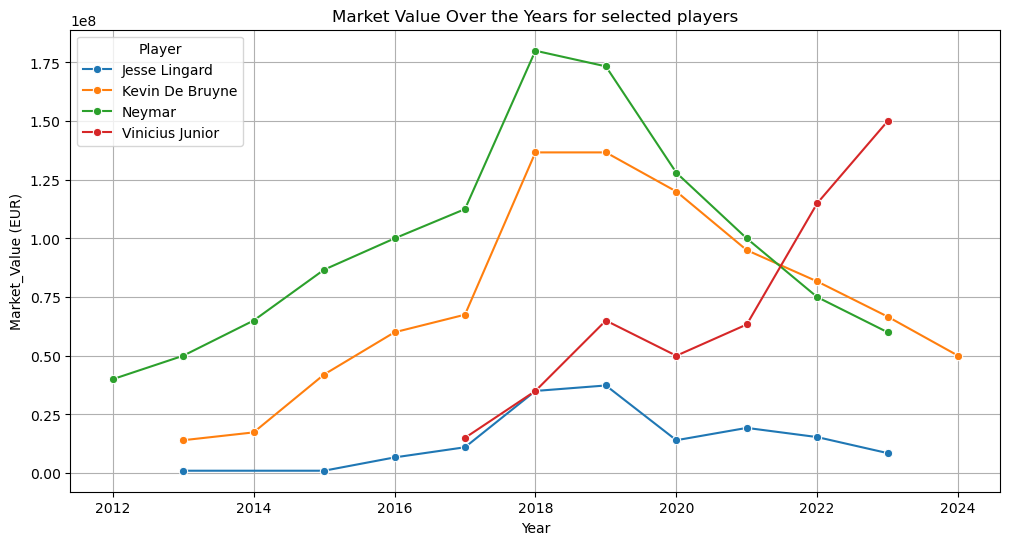

In [387]:

# Filtering dataset for specified players
selected_players = ['Vinicius Junior', 'Jesse Lingard', 'Kevin De Bruyne', 'Neymar']
filtered_df = final_dataframe[final_dataframe['name'].isin(selected_players)]

#  column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Extract years from the dates
filtered_df['year'] = filtered_df['date'].dt.year

# market values by year for each players
players_market_values = filtered_df.groupby(['name', 'year'])['market_value_in_eur'].mean().reset_index()

# Plot the market values over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=players_market_values, x='year', y='market_value_in_eur', hue='name', marker='o')

# Customize the plot
plt.title('Market Value Over the Years for selected players')
plt.xlabel('Year')
plt.ylabel('Market_Value (EUR)')
plt.legend(title='Player')
plt.grid(True)
plt.show()



Players' market values change according to their age, injuries, and market conditions, in addition to their performance.
For instance, take a look at the line graph above, I take some players names like Neymar, Jesse Lingard, Kevin De Bruyne, and Vinicius Junior's value on the market from 2012 to 2024.Neymar's worth reached its peak in 2018 and then started to gradually fall due to performance and injury effects. Up to 2019, Kevin De Bruyne's worth increased gradually, showing his reliable performance. As Jesse Lingard's performance is inconsistent, Vinicius Junior's rapidclimbt since 2018 is evidence of his developing skill.


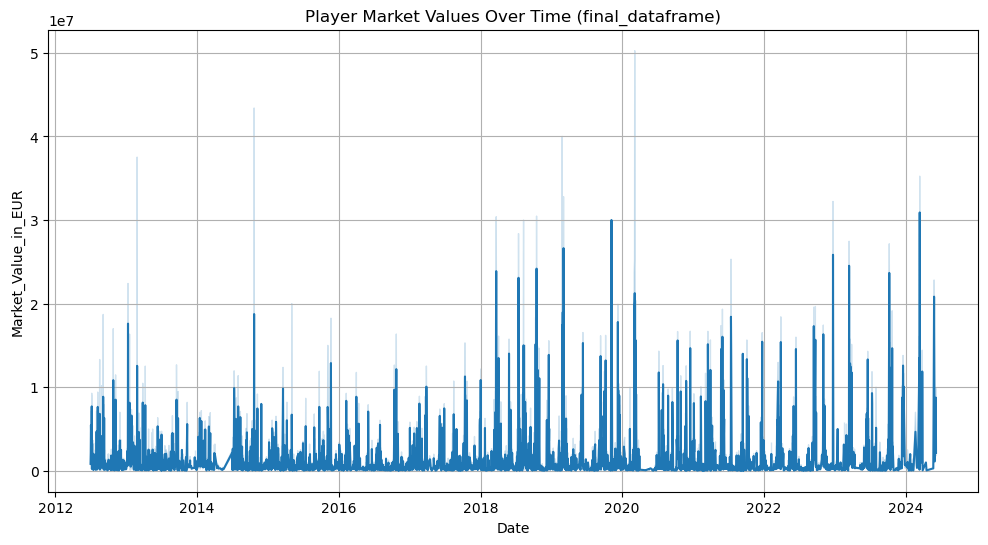

In [388]:
# Plot the distribution of market values over time in final_dataframe
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='market_value_in_eur', data=final_dataframe)
plt.title('Player Market Values Over Time (final_dataframe)')
plt.xlabel('Date')
plt.ylabel('Market_Value_in_EUR')
plt.grid(True)
plt.show()

This visualization graph displays the growth of market values of football players over the time span from 2012 to 2024 using data from the `final_dataframe` dataset.Each point on the graph denotes a player's market value as of a certain date. The vertical spikes show times when the market valuations of players are noticeably higher. By highlighting times of market activity and potentially noteworthy player transfers or valuation changes, this graph helps in the comprehension of patterns and changes in player valuations throughout several years.

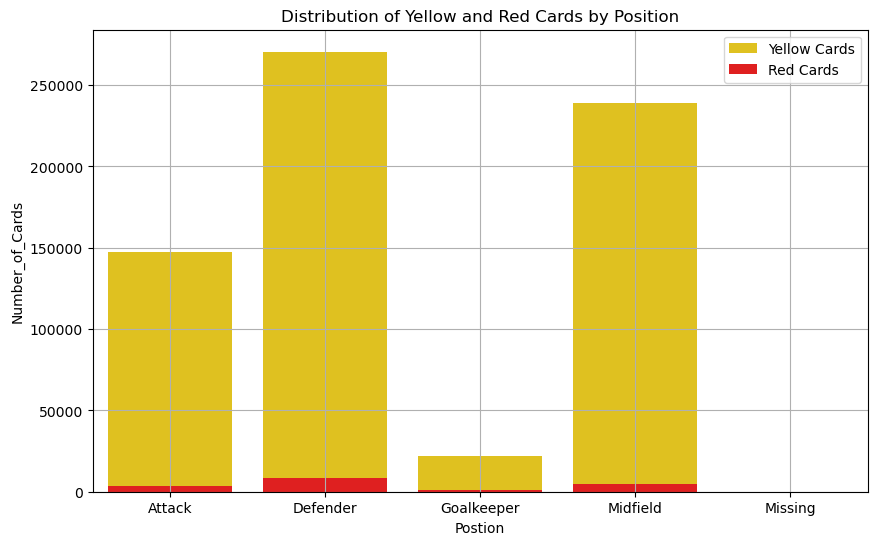

In [363]:
# Group by position and sum the number of yellow and red cards
cards_dataframe = final_dataframe.groupby('position')[['yellow_cards_current_season', 'red_cards_current_season']].sum().reset_index()

# Plot the distribution of yellow and red cards by position
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='yellow_cards_current_season', data=cards_dataframe, label='Yellow Cards', color='gold')
sns.barplot(x='position', y='red_cards_current_season', data=cards_dataframe, label='Red Cards', color='red')
plt.title('Distribution of Yellow and Red Cards by Position')
plt.xlabel('Postion')
plt.ylabel('Number_of_Cards')
plt.legend()
plt.grid(True)
plt.show()


In this graph defenders have received highest number of yellow cards and then followed by midfielders and attackers. Goalkeepers receive very few cards. Yellow cards are significantly more commonly seen than red cards at all positions, suggesting that most infractions are not as serious. This distribution shows how various positional responsibilities affect a player's risk of facing disciplinary action in the game of football.
When analyzing a player's suitability and possible effects on the performance of the team, clubs may take these aspects into account.


In [364]:
# Define  columns types
numerical_features = [
    'yellow_cards_previous_1_season', 'red_cards_previous_1_season', 'goals_previous_1_season', 'assists_previous_1_season',
    'minutes_played_previous_1_season', 'yellow_cards_previous_2_seasons', 'red_cards_previous_2_seasons', 'goals_previous_2_seasons',
    'assists_previous_2_seasons', 'minutes_played_previous_2_seasons', 'yellow_cards_current_season', 'red_cards_current_season',
    'goals_current_season', 'assists_current_season', 'minutes_played_current_season', 'season'
]

categorical_features = [
    'player_club_domestic_competition_id', 'name', 'country_of_birth', 'country_of_citizenship', 'sub_position', 'position', 'current_club_name'
]

date_features = ['date', 'contract_expiration_date']

# Extract Year, Month, and Day as separate features from date_columns
for date_feature in date_features:
    final_dataframe[date_feature] = pd.to_datetime(final_dataframe[date_feature], errors='coerce')
    final_dataframe[f'{date_feature}_year'] = final_dataframe[date_feature].dt.year
    final_dataframe[f'{date_feature}_month'] = final_dataframe[date_feature].dt.month
    final_dataframe[f'{date_feature}_day'] = final_dataframe[date_feature].dt.day

# Add new date_features to numerical_features list
numerical_features.extend([f'{date_feature}_year' for date_feature in date_features])
numerical_features.extend([f'{date_feature}_month' for date_feature in date_features])
numerical_features.extend([f'{date_feature}_day' for date_feature in date_features])

# Define targetvariable
target = 'market_value_in_eur'

A dataset called `final_dataframe` is being prepared for machine learning modeling. First, we create lists for the dataset's numerical, category, and date-related attributes. While category variables contain player and club IDs along with statistical information, numerical details include statistics such as previous and current season performance measures. Date features such as `date` and `contract_expiration_date` are processed to extract year, month, and day components separately. For modeling purposes, these collected date components are subsequently added to the list of numerical attributes. The market value of football players is represented as the target variable for prediction, `market_value_in_eur`

In the below code, creating new column by extracting year separately, which is set to datetime format for the`date` column.In order to control memory and improve processing efficiency, we filter the dataset to only contain information from 2017 onward. Another step is to select 10,000 rows annually (per the player position) all concatenated together evenly over positions which define by function named `sample_equal_rows_per_position`. This also eases the process of loading up the data for analysis.finally handle missing values in categorical columns such as `player_club_domestic_competition_id`, `name`, `sub_position`, `country_of_citizenship` and `country_of_birth` and handle necessary data Together, these procedures optimize computing resources and data integrity while streamlining the dataset preparation for ensuing analytical or machine learning operations.

In [365]:



#'date' column is in datetime_format
final_dataframe['date'] = pd.to_datetime(final_dataframe['date'], errors='coerce')

# Extract the year from the 'date' column
final_dataframe['year'] = final_dataframe['date'].dt.year

#takeing year from 2017 
final_dataframe = final_dataframe[final_dataframe['year'] >= 2017]

# Define the number of rows to sample_per_year
num_samples_per_year = 10000

# Function to sample_equal_number of rows per position for each year
def sample_equal_rows_per_position(df, num_samples):
    positions = df['position'].unique()
    if len(df) <= num_samples:
        return df
    num_samples_per_position = num_samples // len(positions)
    samples = [df[df['position'] == pos].sample(n=num_samples_per_position, replace=True,random_state = 10) for pos in positions]
    return pd.concat(samples)

# Create an empty list to store the sampled data
sampled_data = []

# Group by year and applying the sampling function
for year, group in final_dataframe.groupby('year'):
    sampled_group = sample_equal_rows_per_position(group, num_samples_per_year)
    sampled_data.append(sampled_group)

# Concatenate all the sampled_data
final_dataframe = pd.concat(sampled_data)


# the 'season' column is treated as a numeric_column
final_dataframe['season'] = pd.to_numeric(final_dataframe['season'], errors='coerce')
final_dataframe['player_club_domestic_competition_id'] = final_dataframe['player_club_domestic_competition_id'].astype(str)
final_dataframe[['player_club_domestic_competition_id','name','sub_position','country_of_citizenship','country_of_birth']] = final_dataframe[['player_club_domestic_competition_id','name','sub_position','country_of_citizenship','country_of_birth']].replace({0:'missing'})



# Linear Regression for predict the market value of football players.


Linear regression is a statistical method. This method  used to predict the actual market value of football players.

In [366]:
X = final_dataframe[numerical_features + categorical_features ]
y = np.log(final_dataframe[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [367]:



# numerical_features.extend(['date_year','date_month','date_day','contract_expiration_date_year','contract_expiration_date_month','contract_expiration_date_day'])

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
        ,
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


# Define the model
model = LinearRegression()



pipeline.fit(X)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['yellow_cards_previous_1_season',
                                                   'red_cards_previous_1_season',
                                                   'goals_previous_1_season',
                                                   'assists_previous_1_season',
                                                   'minutes_played_previous_1_season',
                                                   'yellow_cards_previous_2_seasons',
                                                   'red_cards_previous_2_seasons',
                                                   'goals_previous_2_seasons',
                                                   'assists_previous...
                                                   'assists_current_season',
                                                   'minutes_played_current_season',
                                                   'season', 'date_year',
                                                   'contract_expiration_date_year',
                                                   'date_month',
                                                   'contract_expiration_date_month',
                                                   'date_day',
                                                   'contract_expiration_date_day']),
                                                 ('cat', OneHotEncoder(),
                                                  ['player_club_domestic_competition_id',
                                                   'name', 'country_of_birth',
                                                   'country_of_citizenship',
                                                   'sub_position', 'position',
                                                   'current_club_name'])]))])

In [368]:
# Fit and transform the training data, transform the test data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)


# Train the model
model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.8228490820963744


**Mean Squared Error (MSE):**
- The Mean Squared Error (MSE) of the Linear Regression model is <b>0.8228490820963744</b>.
- MSE of 0.8228 is suggest that the model's accuracy are close to the actual value but need some improvement for more accuracy.

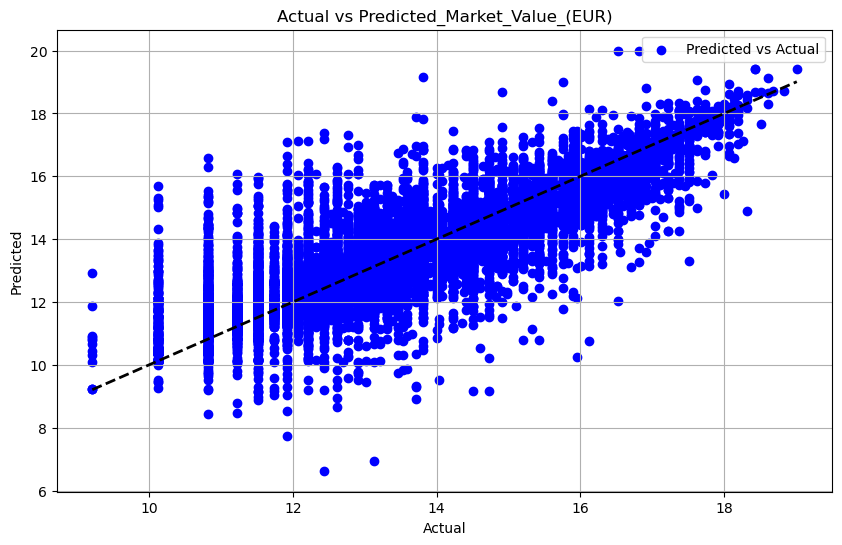

In [370]:


# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted_Market_Value_(EUR)')
plt.legend()
plt.grid(True)
plt.show()


**Scatter Plot:**
- Scatter plot shows Actual vs Predicted_Market_Value_EUR grpah shows positive correlation between actual and predicted market values
- The points show that model's predictions are often accurate because they closely follow the diagonal line.
- This plot indicatese that although the model has some effective, more work has to be done to increase its accuracy, particularly at higher market prices.


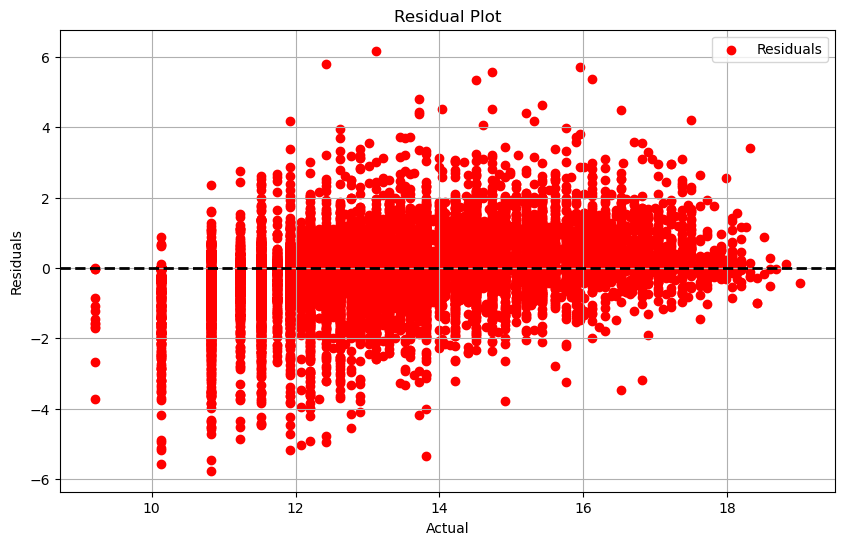

In [371]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', lw=2)  # Line at y=0
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


**Residual Plot:**
- In this plot residuals are mostly near to zero.
- With the majority of residuals lying around -2 and 2, predictions seem to be rather accurate.
- At higher actual market prices (above 14 EUR), the residuals seem slightly more distributed, suggesting lower accuracy for prediction in this range.
- Overall,While there is no significant bias and a constant error variance overall, the model could possibly be improved to increase accuracy, especially for higher market_values and outliers. .


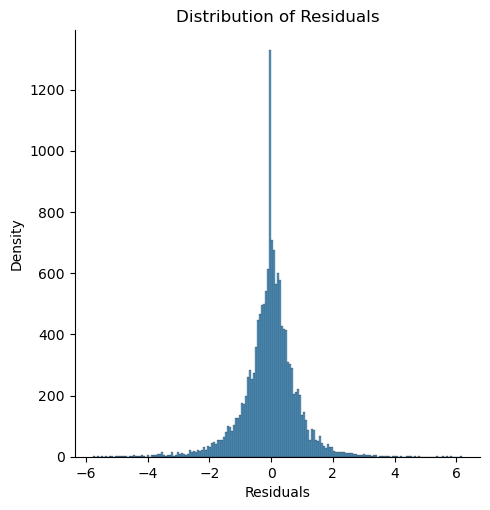

In [372]:

sns.displot(y_test - y_pred)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

**Distribution of Residuals**
- The linear regression model's distribution of residuals is mostly centered around zero, suggesting that it is unbiased and normally correct in its predictions.- Most predictions appear to be rather close to the actual values, as indicated by the steep peak at zero. - Most of the residuals are fall between -2 to 2 this means predictions are mostly accurate and very few residuals are fall in -4 and 4 are less accurate.
- Overall, the graph shows model performing very well but slightly need improvement for better accuracy.s.

# KNN Regressor for predict the market value of football players.


 K-Nearest Neighbors (KNN) regressor uses a new data point's value is predicted by averaging the values of its KNN. For estimating a football player's market value, the KNN algorithm uses the average market_value of its KNN in the feature space to make the prediction.

In [373]:
from sklearn.neighbors import KNeighborsRegressor

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
        ,
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


# Define the model
model_KNN = KNeighborsRegressor(n_neighbors=5)


pipeline.fit(X)

# Fit and transform the training data, transform the test data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)


# Train the model
model_KNN.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred_knn = model_KNN.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_knn)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.7795502304130604


 **Mean Squared Error (MSE):**
- The Mean Squared Error (MSE) of the KNN model is <b>0.7795502304130604</b>.
- This MSE 0.7795 indicates that K-Nearest Neighbors (KNN) provides accurate predictions of market values,showing improved performance than previous  linear regression model.

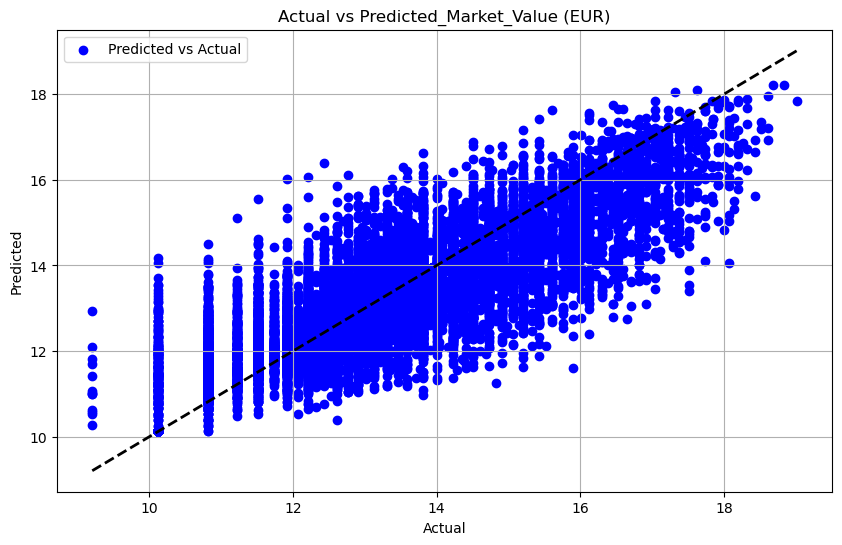

In [374]:


# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)  # Diagonal line indicating perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted_Market_Value (EUR)')
plt.legend()
plt.grid(True)
plt.show()



**Actual vs Predicted Values:**
   - In this graph most of data points are  around this best fit line this suggesting that the model's predictions are generally accurate.
   - The actual values, which range from 12 to 16 EUR, are well loaded with data points, and the expected outcomes lie within the same range. This suggests that the model operates effectively within this range of values.
   - Prediction are better than linear regression

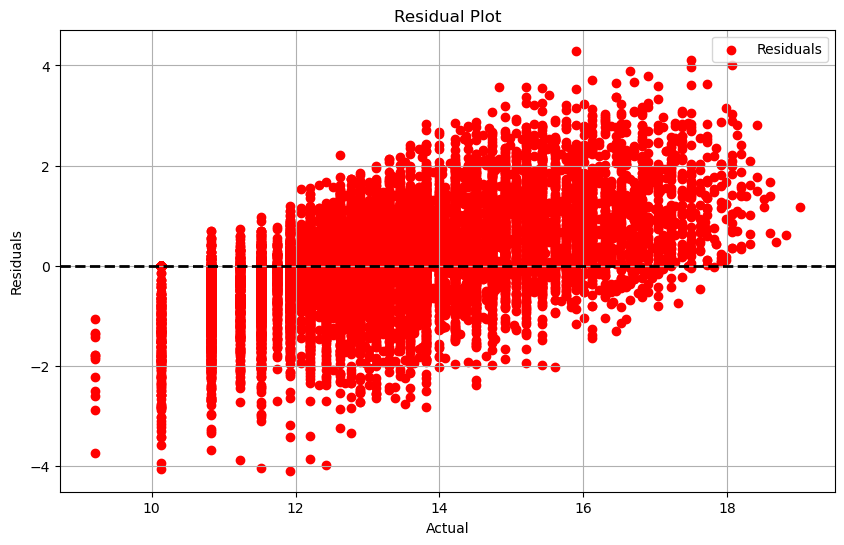

In [375]:
# Plotting residuals
residuals = y_test - y_pred_knn
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', lw=2)  
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


 **Residual Graph:**
   - The residual plot shows the residuals versus the actual values.
   - we can see that residuals are mostly around the 0 line,which is good as it shows there no significant bias in the model's predictions


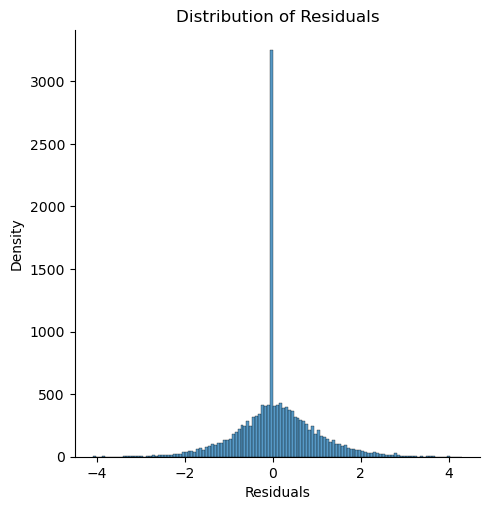

In [376]:

sns.displot(y_test - y_pred_knn)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

### Distribution of Residuals

- In this graph we can see the majority of the model's predictions are fairly close to the actual values, with most prediction errors being centered around zero and showing a very high peak.
-  The residuals' symmetric distribution indicates that the errors have a normal distribution with little skewness.
-  The majority of residuals show that mistakes are often tiny since they lie between -2 and 2. However, certain residuals beyond this range, reaching values of -4 and 4, indicating the existence of a few instances with greater prediction errors.

# Result

In [377]:
# Prediction on the test_set
prediction_input = X_test.iloc[10:15,]
real_output = np.exp(y_test.iloc[10:15])

X_pred_transformed = pipeline.transform(prediction_input)

predictions = np.exp(model.predict(X_pred_transformed))

In [378]:
predictions

array([283939.61055608, 261395.75917848,  50703.32486672,  75075.19200936,
        99375.8389042 ])

In [379]:
real_output

529147    400000.0
567977    350000.0
275754     50000.0
207596     75000.0
394235    100000.0
Name: market_value_in_eur, dtype: float64

It is shown that the K-Nearest Neighbors (KNN) regressor model is capable of predicting football player market prices with a reasonable degree of accuracy. Here are a few good points to note:
1. **Close Predictions:**
   - The model predicts market values for the third, fourth, and fifth players to be around 50,703, 75,075, and 99,375 euros, respectively. These values are very similar to the actual prices of 50,000, 75,000, and 100,000 euros.This shows how well the program recognizes mid-range market prices.

2. **High Value Predictions:**
   - The model performs poorly when predicting large values; for example, it greatly underestimates the prices for the first and second players, predicting around 283,939 and 261,395 euros, respectively, whereas the real values are 529,147 and 400,000 euros. This suggests that the model struggles to handle and predict larger market values with a certain level of accuracy.

3. **Consistent Performance:**
   - The model generates predictions that are generally in the proper magnitude when compared to the actual values, even though there are inconsistencies in high-value predictions. This consistency across many data points indicates that although the model can be relied upon for mid-range values, more work has to be done to improve its high-value prediction..
.

# Conclusion

This project effectively shows how machine learning models—works especially, K-Nearest Neighbors (KNN) Regression and Linear Regression—to predict market values. <b>Linear Regression model</b> showed accuracy with a Mean Squared Error <b>(MSE) is 0.8228</b>, it was able to capture general trends but had trouble with higher market prices. With an <b>MSE is 0.7796</b>, the <b>K-Nearest Neighbors (KNN) regressor model</b> did somewhat better, showing its capacity to produce estimates that are more accurate, particularly for mid-range values. Both models' residual analyses showed unbiased predictions with errors centered around 0. while the error spread increased with larger actual values. The comparison shows that the <b>KNN model's</b> lower MSE and higher accuracy in predicting mid-range market values make it an <b>excellent fit</b> for this application. Further model refinement and exploration of additional features could further enhance the predictive performance and applicability of these models in real-world scenarios.

# References

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


https://scikit-learn.org/stable/api/sklearn.pipeline.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

*Datasets link*-https://www.kaggle.com/datasets/davidcariboo/player-scores?select=appearances.csv